In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import matplotlib.pyplot as plt

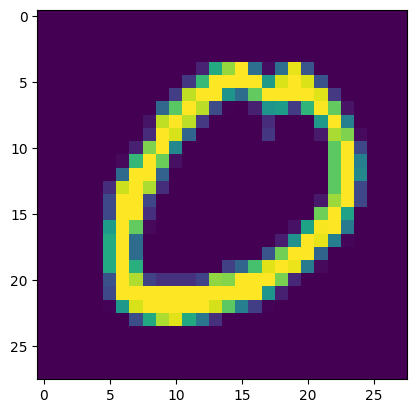

In [33]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [34]:
x=df.iloc[:,1:]
y= df.iloc[:,0]

In [7]:
x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42) 

In [36]:
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
x_train.shape

(33600, 784)

In [38]:
x_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29359,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y_train

34941    6
24433    5
24432    3
8832     4
30291    7
        ..
6265     9
11284    9
38158    2
860      6
15795    0
Name: label, Length: 33600, dtype: int64

In [40]:
y_test

5457     8
38509    1
25536    9
31803    9
39863    8
        ..
8388     4
29359    9
40276    3
18421    0
4335     9
Name: label, Length: 8400, dtype: int64

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
import time
start = time.time()
y_pred = knn.predict(x_test)
print(time.time()-start)

12.866633892059326


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [22]:
# now i use pca and get same accuracy in less time

In [45]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()

In [46]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [47]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
#pca
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
#if we use n_components as None then all columns will be taken into account but now only top 100 wilb be considered

In [50]:
#finding eigen values and eigen vectors and shifting data on new coordinate axis
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [55]:
 x_train.shape

(33600, 784)

In [56]:
#here we have only 100 columns in transform space instead of 784 columns
x_train_trf.shape

(33600, 100)

In [57]:
knn = KNeighborsClassifier()

In [59]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [60]:
import time
start = time.time()
y_predp = knn.predict(x_test_trf) 
print(time.time()- start)

1.7656145095825195


In [61]:
#thus from 12s to 2 sec ,pca helps 

In [62]:
accuracy_score(y_test,y_predp)

0.9539285714285715

In [65]:
#as we keep on changing the number of components , accuracy differ

for i in range(1,785):
    pca = PCA(n_components=i)
    x_train_trf=pca.fit_transform(x_train)
    x_test_trf = pca.transform(x_test)
    knn = KNeighborsClassifier()
    knn.fit(x_train_trf,y_train)
    y_predp = knn.predict(x_test_trf)
    print(accuracy_score(y_test,y_predp))

0.255
0.32452380952380955
0.5104761904761905
0.666547619047619
0.7378571428571429
0.8229761904761905
0.8432142857142857
0.8717857142857143
0.8870238095238095
0.9054761904761904
0.911547619047619
0.9173809523809524
0.9272619047619047
0.9348809523809524
0.9386904761904762
0.9379761904761905
0.9404761904761905
0.9411904761904762
0.9430952380952381
0.9438095238095238
0.9445238095238095
0.9438095238095238
0.9439285714285715
0.9452380952380952
0.9475
0.9469047619047619
0.9475
0.9476190476190476
0.9502380952380952
0.9489285714285715
0.9508333333333333
0.9510714285714286
0.95
0.9504761904761905
0.9520238095238095
0.9521428571428572
0.9522619047619048
0.9523809523809523
0.9533333333333334
0.9527380952380953
0.9535714285714286
0.9535714285714286
0.9526190476190476
0.9533333333333334
0.954047619047619
0.9529761904761904
0.9528571428571428
0.9536904761904762
0.9539285714285715
0.9527380952380953
0.9545238095238096
0.9535714285714286
0.9538095238095238
0.954047619047619
0.9539285714285715
0.9539285

KeyboardInterrupt: 